In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.2/110.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 86.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━

In [1]:
## importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  pandas as pd
plt.style.use('seaborn-v0_8-darkgrid')
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score,mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [2]:
## loading the data
airline_passengers_data = pd.read_csv("/content/airline_passengers.csv",index_col='Month')
## checking the firsst five rows
airline_passengers_data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [3]:
## checking the shape of the data
airline_passengers_data.shape

(144, 1)

In [4]:
## checking the index of the column
airline_passengers_data.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [5]:
## converting the index of the airline passengers to datwttime ande then to Monthly periodicity
airline_passengers_data.index = pd.to_datetime(airline_passengers_data.index).to_period("M")
## check the index again
airline_passengers_data.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Month', length=144)

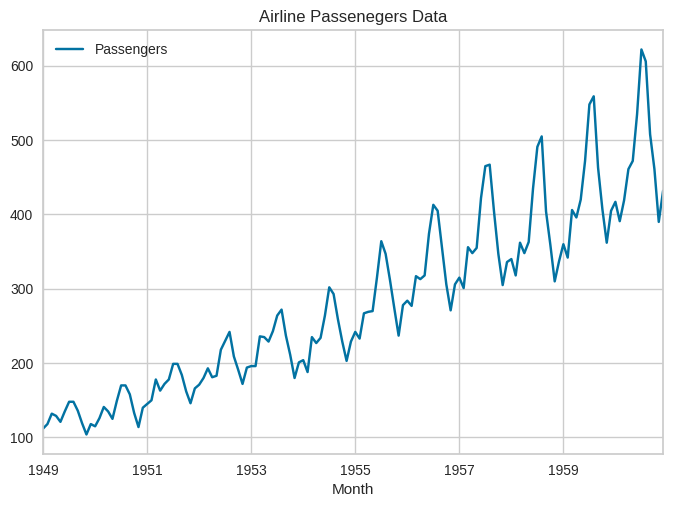

In [67]:
### plotting the airline passnegrs data
plt.figure(figsize=(20,10))
airline_passengers_data.plot()
plt.title("Airline Passenegers Data")
plt.show()

setting up pycaret

In [7]:
## importing pycaret
from pycaret.time_series import *
from pycaret.time_series import TSForecastingExperiment

In [8]:
## creating the experiment
exp = TSForecastingExperiment()
## initialize the setup
exp.setup(data=airline_passengers_data,target='Passengers',fh=12,coverage=0.95)

,Description,Value
0,session_id,2688
1,Target,Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [9]:
### checking for the summary statsistics
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


Train and Test plot

In [10]:
## plotting the time series plot
fig = exp.plot_model(
    plot='train_test_split',
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='Airline Passengers Train and Test data',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

Decompostion plots

In [11]:
## classical decompostion plot
## plotting the time series plot
fig = exp.plot_model(
    plot='decomp',
    data_kwargs=dict(type='additive'),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='Classical Decomposition plot [Additive]',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

In [12]:
## classical decompostion plot
## plotting the time series plot
fig = exp.plot_model(
    plot='decomp',
    data_kwargs=dict(type='mult'),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='Classical Decomposition plot [Multiplicative]',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

In [13]:
## stl decomposition
## classical decompostion plot
## plotting the time series plot
fig = exp.plot_model(
    plot='decomp_stl',
    data_kwargs=dict(type='additive'),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text=' STL Decomposition plot',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

ACF and PACF plots

In [14]:
##  acf and pacg plots
## classical decompostion plot
## plotting the time series plot
fig = exp.plot_model(
    plot='acf',
    data_kwargs=dict(nlags=50),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='ACF PLOT',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

In [15]:
## pacf plot
## classical decompostion plot
## plotting the time series plot
fig = exp.plot_model(
    plot='pacf',
    data_kwargs=dict(type='additive'),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='PACF PLOT',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

**Exponential Smoothing Methods**

In [16]:
## checking the available packages in pycaret
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


SES

In [17]:
##  craeting the ses method
ses = exp.create_model('exp_smooth',trend=None,seasonal=None ,sp=None,cross_validation=False)


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.5006,2.9849,76.1426,103.1245,0.1428,0.1616,-0.9198


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
## gettting the metrics
ses.get_params()

{'damped_trend': False,
 'damping_trend': None,
 'initial_level': None,
 'initial_seasonal': None,
 'initial_trend': None,
 'initialization_method': 'estimated',
 'method': None,
 'minimize_kwargs': None,
 'optimized': True,
 'random_state': None,
 'remove_bias': False,
 'seasonal': None,
 'smoothing_level': None,
 'smoothing_seasonal': None,
 'smoothing_trend': None,
 'sp': None,
 'start_params': None,
 'trend': None,
 'use_boxcox': None,
 'use_brute': True}

In [19]:
## ses insample prredictionds
## pacf plot
## classical decompostion plot
## plotting the time series plot
fig = exp.plot_model(
    estimator=ses,
    plot='insample',
    data_kwargs=dict(labels=['Simple Exponential Smoothing']),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='Simple Exponential Smoothing Insample Predictions',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

In [20]:
## Index of the train set
airline_passengers_data.index[:-12]

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1959-03', '1959-04', '1959-05', '1959-06', '1959-07', '1959-08',
             '1959-09', '1959-10', '1959-11', '1959-12'],
            dtype='period[M]', name='Month', length=132)

plotting the residuals of thee ses model

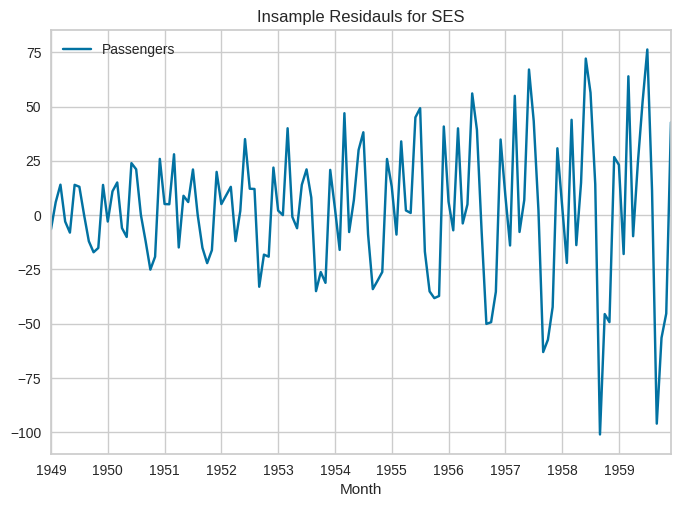

In [21]:
## plotting the residuals of the ses model
residuals = ses.predict_residuals(airline_passengers_data[:-12])
residuals.plot()
plt.title('Insample Residauls for SES')
plt.show()

In [22]:
## the Insample predictions
y_pred_insample = ses.predict(airline_passengers_data.index[:-12])
y_pred_insample

,Passengers
Month,
1949-01,118.466667
1949-02,112.032333
1949-03,117.970162
1949-04,131.929851
1949-05,129.014649
...,...
1959-08,547.618697
1959-09,558.943093
1959-10,463.479715


**Evaluating Insample Predictions**

In [23]:
## print eveluation metrics
print(f"The R squared for Insample Predictions is : {round(r2_score(airline_passengers_data[:-12],y_pred_insample),4)*100} %")
print("--"*50)
print(f"The Mean Absolute  percentage Error is : {round(mean_absolute_percentage_error(airline_passengers_data[:-12],y_pred_insample),4)*100} %")
print("--"*50)
print(f"The Mean Absolute Error is : {round(mean_squared_error(airline_passengers_data[:-12],y_pred_insample),4)}")
print("--"*50)
print(f"The Mean Absolute Error is : {round(mean_absolute_error(airline_passengers_data[:-12],y_pred_insample),4)*100}")


The R squared for Insample Predictions is : 91.34 %
----------------------------------------------------------------------------------------------------
The Mean Absolute  percentage Error is : 8.97 %
----------------------------------------------------------------------------------------------------
The Mean Absolute Error is : 977.4151
----------------------------------------------------------------------------------------------------
The Mean Absolute Error is : 2398.3


In [24]:
## Outsample predictions

y_pred_out_of_sample = ses.predict(airline_passengers_data.index[-12:])
y_pred_out_of_sample

,Passengers
1960-01,404.786132
1960-02,404.786132
1960-03,404.786132
1960-04,404.786132
1960-05,404.786132
1960-06,404.786132
1960-07,404.786132
1960-08,404.786132
1960-09,404.786132
1960-10,404.786132


Evaluation Metrics Out of sample

In [25]:
## print eveluation metrics
print(f"The R squared for Insample Predictions is : {round(r2_score(airline_passengers_data[-12:],y_pred_out_of_sample),4)*100} %")
print("--"*50)
print(f"The Mean Absolute  percentage Error is : {round(mean_absolute_percentage_error(airline_passengers_data[-12:],y_pred_out_of_sample),4)*100} %")
print("--"*50)
print(f"The Mean Absolute Error is : {round(mean_squared_error(airline_passengers_data[-12:],y_pred_out_of_sample),4)}")
print("--"*50)
print(f"The Mean Absolute Error is : {round(mean_absolute_error(airline_passengers_data[-12:],y_pred_out_of_sample),4)*100}")


The R squared for Insample Predictions is : -91.97999999999999 %
----------------------------------------------------------------------------------------------------
The Mean Absolute  percentage Error is : 14.280000000000001 %
----------------------------------------------------------------------------------------------------
The Mean Absolute Error is : 10634.6529
----------------------------------------------------------------------------------------------------
The Mean Absolute Error is : 7614.26


In [26]:
## using built in fumctions
exp.predict_model(ses,fh=12)


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,2.5006,2.9849,76.1426,103.1245,0.1428,0.1616,-0.9198


,y_pred
1960-01,404.7861
1960-02,404.7861
1960-03,404.7861
1960-04,404.7861
1960-05,404.7861
1960-06,404.7861
1960-07,404.7861
1960-08,404.7861
1960-09,404.7861
1960-10,404.7861


**Holts Linear Trend**

In [27]:
## holts Linear Trend
ht= exp.create_model('exp_smooth',trend='add',seasonal=None,sp=None,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.2069,2.7073,67.2002,93.5338,0.1259,0.1402,-0.5793


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
## forecasting 24 months from the train set
fig = exp.plot_model(
    estimator=ht,
    plot='forecast',
    data_kwargs=dict(labels=['Holts Linear Trend'],fh=24),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='HOLTS LINEAR TREND 24 MONTHS FORECASTS INTO THE FUTURE',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

In [29]:
## displaying thee 24 months predictions
exp.predict_model(ht,fh=24)

,y_pred
1960-01,406.8585
1960-02,408.9205
1960-03,410.9826
1960-04,413.0446
1960-05,415.1066
1960-06,417.1687
1960-07,419.2307
1960-08,421.2927
1960-09,423.3547
1960-10,425.4168


**Holts Winters Methods**

In [30]:
## holts winter
hw = exp.create_model('exp_smooth',trend='add',seasonal='add',sp=12,cross_validation=False)


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.4394,0.4915,13.3805,16.9799,0.0280,0.0280,0.9480


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
## holts winter multiplicative
hw_mult= exp.create_model("exp_smooth",trend='add',seasonal='mul',sp=12,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.3382,0.4575,10.2997,15.8074,0.0221,0.0216,0.9549


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
## holts winter damped trend
hw_damped = exp.create_model("exp_smooth",damped_trend='True',trend='add',seasonal='mul',sp=12,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.3990,0.5069,12.1481,17.5115,0.0254,0.0248,0.9446


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Comparing all the exponential smootthing method**

In [33]:
### comparing thee models
exp.compare_models(include=[ses,ht,hw,hw_mult,hw_damped],cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
3,Exponential Smoothing,0.3382,0.4575,10.2997,15.8074,0.0221,0.0216,0.9549,0.1600
4,Exponential Smoothing,0.3990,0.5069,12.1481,17.5115,0.0254,0.0248,0.9446,0.1500
2,Exponential Smoothing,0.4394,0.4915,13.3805,16.9799,0.0280,0.0280,0.9480,0.0900
1,Exponential Smoothing,2.2069,2.7073,67.2002,93.5338,0.1259,0.1402,-0.5793,0.0200
0,Exponential Smoothing,2.5006,2.9849,76.1426,103.1245,0.1428,0.1616,-0.9198,0.0100


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

ExponentialSmoothing(seasonal='mul', sp=12, trend='add')

Plotting the Out-Sample for all the methods

In [34]:
## forecasting 24 months from the train set
fig = exp.plot_model(
    estimator=[ses,ht,hw,hw_mult,hw_damped],
    plot='forecast',
    data_kwargs=dict(labels=['Simple Exponential Smoothing','Holts Linear','Holts Winter','holts Winter Multiplicative','holts Winter Damped']),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='OUT-OF-SAMPLE-PREDICTIONS-FOR-SMOOTHING-METHODS',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

In [35]:
## holts winter multiplicative forecats
## forecasting 24 months from the train set
fig = exp.plot_model(
    estimator=hw_mult,
    plot='forecast',
    data_kwargs=dict(labels=['Holts Winter Multiplicative'],fh=24),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='HOLTS WINTER MULTIPLICATIVE SEASONALITY 24 MONTHS FORECASTS INTO THE FUTURE',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

**Model Diagnostics**

In [36]:
## holts winter multiplicative forecats
## forecasting 24 months from the train set
fig = exp.plot_model(
    estimator=hw_mult,
    plot='diagnostics',
    # data_kwargs=dict(labels=['Holts Winter Multiplicative'],fh=24),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='HOLTS WINTER MULTIPLICATIVE SEASONALITY RESIDUAL DIAGNOSTICS',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

**ETS MODELS**

In [37]:
## ets models
ets_ANN = exp.create_model("ets",error='add',trend=None,seasonal=None,sp=None,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.4960,2.9807,76.0029,102.9795,0.1425,0.1612,-0.9144


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
## ets_AAN
ets_AAN = exp.create_model("ets",error='add',trend='add',seasonal=None,sp=None,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.1789,2.6833,66.3466,92.7039,0.1243,0.1382,-0.5514


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [39]:
## ets AAM
ets_AAM = exp.create_model("ets",error='add',trend='add',seasonal='mul',sp=None,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.3129,0.4475,9.5287,15.4598,0.0203,0.0199,0.9569


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Compare the Models**

In [40]:
## compaaring the models
exp.compare_models([ets_ANN,ets_AAN,ets_AAM])

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
2,ETS,0.5931,0.6212,17.4165,20.5102,0.0440,0.0445,0.8882,0.2300
1,ETS,2.0663,2.4801,60.4649,81.7642,0.1373,0.1539,-0.7902,0.0800
0,ETS,2.3600,2.7613,69.0301,91.0345,0.1569,0.1792,-1.2217,1.6200


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

AutoETS(seasonal='mul', sp=None, trend='add')

plotting the out sample  predctions for ETS(AAM)

In [41]:
## holts winter multiplicative forecats
## forecasting 24 months from the train set
fig = exp.plot_model(
    estimator=ets_AAM,
    plot='forecast',
    data_kwargs=dict(labels=['ETS(A,A,M)'],fh=24),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='ETS(Additive Error,Addittive Trend,Multiplicative Seasonality) 24 MONTHS FORECASTS INTO THE FUTURE',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

In [42]:
## getting the predictions
exp.predict_model(ets_AAM,fh=24)

,y_pred
1960-01,417.2261
1960-02,394.0013
1960-03,462.2043
1960-04,448.3359
1960-05,471.6357
1960-06,539.3344
1960-07,623.5598
1960-08,630.7463
1960-09,515.2000
1960-10,449.7407


In [43]:
## holts winter multiplicative forecats
## forecasting 24 months from the train set
fig = exp.plot_model(
    estimator=[ets_ANN,ets_AAN,ets_AAM],
    plot='forecast',
    data_kwargs=dict(labels=['ETS(A,N,N)','ETS(A,A,N)','ETS(A,A,M)'],fh=24),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='ETS MODEL FORECASTS 24 MONTHS FORECASTS INTO THE FUTURE',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

In [46]:
## holts winter multiplicative forecats
## forecasting 24 months from the train set
fig = exp.plot_model(
    estimator=ets_AAM,
    plot='diagnostics',
    # data_kwargs=dict(labels=['Holts Winter Multiplicative'],fh=24),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='ETS(Additive Error,Additive Trend,Multiplicative Seasonality) RESIDUAL DIAGNOSTICS',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

ETS(A,A,M) summry

In [48]:
## ets A,A,M summary
ets_AAM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:                       ETS(AAM)   Log Likelihood                -488.626
Date:                Wed, 09 Apr 2025   AIC                           1013.253
Time:                        11:31:03   BIC                           1065.143
Sample:                    01-31-1949   HQIC                          1034.339
                         - 12-31-1959   Scale                           96.116
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.3734      0.067      5.551      0.000       0.242       0.505
smoothing_trend      3.734e-05        nan        nan        nan         nan         nan
smoothing_seasonal      0.6266      0.067      9.296      0.000       0.494       0.759
initial_level         109.3480        nan        nan        nan         nan         nan
initial_trend           2.6556        nan        nan        nan         nan         nan
initial_seasonal.0      0.9773        nan        nan        nan         nan         nan
initial_seasonal.1      0.8482        nan        nan        nan         nan         nan
initial_seasonal.2      0.9508        nan        nan        nan         nan         nan
initial_seasonal.3      1.0885        nan        nan        nan         nan         nan
initial_seasonal.4      1.1927        nan        nan        nan         nan         nan
initial_seasonal.5      1.2076        nan        nan        nan         nan         nan
initial_seasonal.6      1.1092        nan        nan        nan         nan         nan
initial_seasonal.7      1.0129        nan        nan        nan         nan         nan
initial_seasonal.8      1.0969        nan        nan        nan         nan         nan
initial_seasonal.9      1.1541        nan        nan        nan         nan         nan
initial_seasonal.10     1.0517        nan        nan        nan         nan         nan
initial_seasonal.11     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                       41.34   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.02   Prob(JB):                         0.54
Heteroskedasticity (H):               2.21   Skew:                             0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

**BENCH MARK MODELS**

In [49]:
## naive forecaster
naive = exp.create_model('naive',cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.4959,2.9807,76.0000,102.9765,0.1425,0.1612,-0.9143


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
## the snaive
snaiave = exp.create_model('snaive',cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,1.5709,1.4678,47.8333,50.7083,0.0999,0.1057,0.5358


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
## plot the forecast snaive
## holts winter multiplicative forecats
## forecasting 24 months from the train set
fig = exp.plot_model(
    estimator=snaiave,
    plot='forecast',
    data_kwargs=dict(labels=['Seasonal Niave Forecaster'],fh=12),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='BENCH MARK SEASONAL NAIVE FORECASTER 12 MONTHS FORECASTS INTO THE FUTURE',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

In [53]:
## plot the forecast snaive
## holts winter multiplicative forecats
## forecasting 24 months from the train set
fig = exp.plot_model(
    estimator=[snaiave,naive],
    plot='forecast',
    data_kwargs=dict(labels=['Seasonal Niave Forecaster','Naive Forecaster'],fh=12),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='BENCH MARK MODEL FORECASTS',x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()

In [57]:
## comapring all the models
exp.compare_models([snaiave,naive,ets_ANN,ets_AAN,ets_AAM,ses,ht,hw,hw_mult,hw_damped,'ets'],cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
4,ETS,0.3129,0.4475,9.5287,15.4598,0.0203,0.0199,0.9569,0.3300
10,ETS,0.3129,0.4475,9.5287,15.4598,0.0203,0.0199,0.9569,0.1000
8,Exponential Smoothing,0.3382,0.4575,10.2997,15.8074,0.0221,0.0216,0.9549,0.1100
9,Exponential Smoothing,0.3990,0.5069,12.1481,17.5115,0.0254,0.0248,0.9446,0.1100
7,Exponential Smoothing,0.4394,0.4915,13.3805,16.9799,0.0280,0.0280,0.9480,0.0900
0,Seasonal Naive Forecaster,1.5709,1.4678,47.8333,50.7083,0.0999,0.1057,0.5358,0.0200
3,ETS,2.1789,2.6833,66.3466,92.7039,0.1243,0.1382,-0.5514,0.0600
6,Exponential Smoothing,2.2069,2.7073,67.2002,93.5338,0.1259,0.1402,-0.5793,0.0300
1,Naive Forecaster,2.4959,2.9807,76.0000,102.9765,0.1425,0.1612,-0.9143,0.0200
2,ETS,2.4960,2.9807,76.0029,102.9795,0.1425,0.1612,-0.9144,0.0800


Processing:   0%|          | 0/49 [00:00<?, ?it/s]

AutoETS(seasonal='mul', sp=None, trend='add')

**Finalizing the Model**

In [60]:
## holdout predictions
holdout_predictions = exp.predict_model(ets_AAM)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ETS,0.3129,0.4475,9.5287,15.4598,0.0203,0.0199,0.9569


In [62]:
## final model
final_model = exp.finalize_model(estimator=ets_AAM)
## print the final model
final_model

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                AutoETS(seasonal='mul',
                                                                        sp=None,
                                                                        trend='add'))]))])

In [64]:
## making predictions on the final Model
## plot the forecast snaive
## holts winter multiplicative forecats
## forecasting 24 months from the train set
fig = exp.plot_model(
    estimator=final_model,
    plot='forecast',
    data_kwargs=dict(labels=['ETS(A,A,M)'],fh=24),
    fig_kwargs=dict(template='plotly_dark', font=dict(size=14, color='white',family='Times New Roman'),paper_bgcolor='black',plot_bgcolor='black'),
  return_fig=True,

)
## update the layout
fig.update_layout(title=dict(text='FINALIZED MODEL ETS(A,A,M) TRAINED ON ENTIRE AIRLINE PASSENGER DATASET 24 MONTHS FORECAST' ,x=0.5,xanchor='center',font=dict(size=22,color='white',family='Times New Roman')))
fig.show()


In [65]:
## getting the predictions
exp.predict_model(estimator=final_model,fh=24)

,y_pred
1961-01,445.4229
1961-02,418.3921
1961-03,464.7036
1961-04,494.5817
1961-05,505.5179
1961-06,573.3778
1961-07,663.6585
1961-08,654.8065
1961-09,546.7023
1961-10,488.2774


**Saving the Model**

In [66]:
exp.save_model(final_model,"Best_smoothing_model")

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 AutoETS(seasonal='mul',
                                                                                                                                         sp=None,
                                                                                                                                         trend='add'))]))]))]))]),
 'Best_smoothing_model.pkl')